# Fixing the value of variables 
Provided a model has been specified to allow this it is possible to fix the values of some endogenous variable. This can be 
useful in many situations. Also when a variable is fixed a matching add factor is calculated. This keeps the result unchanged 
when the fixing is lifted and the marginal properties of the model is preserved. 

## Import the model class
This class incorporates most of the methods used to manage a model. 

In [1]:
 %load_ext autoreload
 %autoreload 2

In [2]:
import pandas as pd
from modelclass import model 
import modelwidget as mw
model.widescreen()
model.scroll_off()

## Load a pre-existing model, data and descriptions 
The file `pak.pcim` contains a dump of model equations, dataframe, simulation options and variable descriptions. The file was created separately. 

The modelload method returns an instance ```mpak``` of the ```model``` class, and a dataframe ```result``` that holds the baseline run. 

In [3]:
mpak,result = model.modelload('../../models/pak.pcim',run=1,silent=1)

## How to fix the values for variables

The equation for a fixable variable should like this: 
>frml <z,exo> VAR  = (expression)*(1-VAR_D) + VAR_X * VAR_D

Each endogenous variable which has an _D variable and _X variable can be fixed
 
_D=1 means that the variable is to be fixed and 

_X holds the value to which it should be fixed

In the pak model all stocastic equations are fixable.

### .fix(dataframe,variable pattern, start,end) Returns a dataframe where variables matching pattern are fixed

The code fixes the values for some variables by setting the _X variable to the current value, and _D variable to 1 in the timespan \[start,end].

In [4]:
var_to_be_fixed = 'PAKGGEXPCAPTCN PAKGGEXPGNFSCN PAKGGEXPOTHRCN PAKGGEXPTRNSCN'
fix_df = mpak.fix(result,var_to_be_fixed,2021,2100)

## Now run the model with the new dataframe

In [5]:
_ = mpak(fix_df,silent=1,keep=f'Baseline') # _ is just a  name, the dataframe is not going to be used 

In [13]:
alternative  =  fix_df.upd("<2023 2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = 29")

In [15]:
_ = mpak(alternative,silent=1,keep=f'Tax = 29',alfa = 0.5)

In [18]:
with mpak.set_smpl(2020,2030):
    display(mpak['PAKNYGDPMKTPKN'])

### .fix_inf() Show relevant variables for each fixed variables
To make it short we only show the first 4 years  

In [6]:
with mpak.set_smpl(2021,2024):
    mpak.fix_inf()


Acquisition of non-financial assets

FRML <Z,EXO> PAKGGEXPCAPTCN = (0.3*PAKGGEXPCAPTCN(-1)+(1-0.3)*(0.37*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0)))+393385.011*DURING_2013 + PAKGGEXPCAPTCN_A)* (1-PAKGGEXPCAPTCN_D)+ PAKGGEXPCAPTCN_X*PAKGGEXPCAPTCN_D  $

FRML <CALC> PAKGGEXPCAPTCN_A = (PAKGGEXPCAPTCN) - (0.3*PAKGGEXPCAPTCN(-1)+(1-0.3)*(0.37*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0)))+393385.011*DURING_2013)$


,PAKGGEXPCAPTCN,PAKGGEXPCAPTCN_X,PAKGGEXPCAPTCN_D,PAKGGEXPCAPTCN_A
2021,3078353.509944,3078353.509944,1,182969.550242
2022,3528758.482618,3528758.482618,1,155524.089341
2023,4022693.753653,4022693.753653,1,132195.457640
2024,4548342.435835,4548342.435835,1,112366.070151



Expenditure on Goods and Services

FRML <Z,EXO> PAKGGEXPGNFSCN = (0.3*PAKGGEXPGNFSCN(-1)+(1-0.3)*(0.80*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0)))+505277.259999999*DURING_2012 + PAKGGEXPGNFSCN_A)* (1-PAKGGEXPGNFSCN_D)+ PAKGGEXPGNFSCN_X*PAKGGEXPGNFSCN_D  $

FRML <CALC> PAKGGEXPGNFSCN_A = (PAKGGEXPGNFSCN) - (0.3*PAKGGEXPGNFSCN(-1)+(1-0.3)*(0.80*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0)))+505277.259999999*DURING_2012)$


,PAKGGEXPGNFSCN,PAKGGEXPGNFSCN_X,PAKGGEXPGNFSCN_D,PAKGGEXPGNFSCN_A
2021,6497667.188546,6497667.188546,1,292080.031238
2022,7494278.046748,7494278.046748,1,248267.965224
2023,8582274.931334,8582274.931334,1,211027.730872
2024,9736041.284685,9736041.284685,1,179373.422392



Other Expenditure

FRML <Z,EXO> PAKGGEXPOTHRCN = (-PAKGGEXPOTHRCN_A*PAKNYGDPMKTPXN*PAKNYGDPPOTLKN+PAKNYGDPMKTPXN*PAKNYGDPPOTLKN* (-0.00363915924526289) ) * (1-PAKGGEXPOTHRCN_D)+ PAKGGEXPOTHRCN_X*PAKGGEXPOTHRCN_D  $

FRML <CALC> PAKGGEXPOTHRCN_A = -PAKGGEXPOTHRCN/(PAKNYGDPMKTPXN*PAKNYGDPPOTLKN)+ ((-0.00363915924526289)) $


,PAKGGEXPOTHRCN,PAKGGEXPOTHRCN_X,PAKGGEXPOTHRCN_D,PAKGGEXPOTHRCN_A
2021,-162497.103734,-162497.103734,1,-0.000607
2022,-190323.987195,-190323.987195,1,-0.000516
2023,-219895.640181,-219895.640181,1,-0.000438
2024,-250821.370656,-250821.370656,1,-0.000373



Transfers

FRML <Z,EXO> PAKGGEXPTRNSCN = (0.91020884318931*PAKGGEXPTRNSCN(-1)+(1-0.91020884318931)*(0.06*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0))) + PAKGGEXPTRNSCN_A)* (1-PAKGGEXPTRNSCN_D)+ PAKGGEXPTRNSCN_X*PAKGGEXPTRNSCN_D  $

FRML <CALC> PAKGGEXPTRNSCN_A = (PAKGGEXPTRNSCN) - (0.91020884318931*PAKGGEXPTRNSCN(-1)+(1-0.91020884318931)*(0.06*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0))))$


,PAKGGEXPTRNSCN,PAKGGEXPTRNSCN_X,PAKGGEXPTRNSCN_D,PAKGGEXPTRNSCN_A
2021,519103.990360,519103.990360,1,42678.845771
2022,559726.959116,559726.959116,1,36277.018900
2023,599209.751283,599209.751283,1,30835.466021
2024,638786.218856,638786.218856,1,26210.145989


### The result match the result before exogenizing, as it should 
Numbers below show the difference in pct betwen the solution whitout and with fixing

The difference is small and OK 

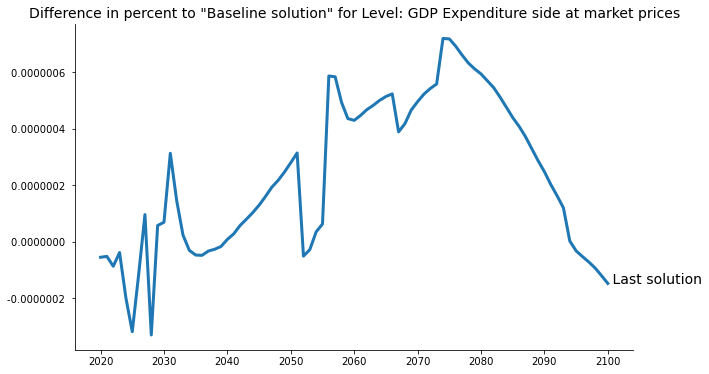

In [7]:
with mpak.keepswitch(True):
    mpak.keep_plot('PAKNYGDPMKTPKN',diffpct=1,dec=7)

## Dump the model and solution for later use

In [8]:
mpak.modeldump('../../models/pak_exogenized.pcim')

## More advanced information
The model instance (here mpak) maintain properties related to the fixing of values.

### List of potential and actual fixed variables
The model instance (here mpak) maintain properties related to the fixing of values.

|Variable type|Variable name suffix|Lists for all fixable variables|List of fixed variables|
|:--|:--|:--|:--|    
Endogenous|  |.fix_endo|.fix_endo_fixed
Dummy|_D|.fix_dummy|.fix_dummy_fixed
Fixed value|_X|.fix_value|.fix_value_fixed
Add factor|_A|.fix_add_factor|.fix_add_factor_fixed

#### LIst of all fixable variables for this model 

In [9]:
all_fix_var =[vars for vars in zip(mpak.fix_dummy,mpak.fix_value,mpak.fix_add_factor)]
fix_names = pd.DataFrame(all_fix_var,columns=['Dummy','Fixed value','Add factor'],index=mpak.fix_endo)
mw.htmlwidget_df(mpak,fix_names).show

HTML(value='<style type="text/css">\n#T_f1376_ thead tr:nth-child(1) th {\n  position: sticky;\n  background-c…

:::{note}
**Dataframes with strings and zip**

Pandas dataframes are very versatile. Here the dataframe is filled not with scalars but with strings. 

Also the zip function is used to combine lists. [More here](https://docs.python.org/3/library/functions.html#zip)
:::

#### List of fixed variables

In [10]:
fixed_fix_var =[vars for vars in 
                 zip(mpak.fix_dummy_fixed,mpak.fix_value_fixed,mpak.fix_add_factor_fixed)]
fixed_names = pd.DataFrame(fixed_fix_var,columns=['Dummy','Fixed value','Add factor'],index=mpak.fix_endo_fixed)
mw.htmlwidget_df(mpak,fixed_names).show

HTML(value='<style type="text/css">\n#T_e648b_ thead tr:nth-child(1) th {\n  position: sticky;\n  background-c…

#### Is there a model (.calc_add_factor_model) available  to calculate the add factors corresponding to the fixed values

In [11]:
mpak.split_calc_add_factor

True

#### Show the equations for the .calc_add_factor_model
Here only 3 are displayed. Delete the [:3] and all equations will be displayed.

In [12]:
mpak.calc_add_factor_model.equations.split('$')[:3]

['FRML <CALC> PAKBMFSTOTHRCD_A = -PAKBMFSTOTHRCD/PAKNYGDPMKTPCD+ ((-0.0106244247103773)) ',
 ' FRML <CALC> PAKBMFSTREMTCD_A = -PAKBMFSTREMTCD/PAKNYGDPMKTPCD+ ((5.83179728399106E-05)) ',
 ' FRML <CALC> PAKBMGSRGNFSCD_A = -100*PAKBMGSRGNFSCD/PAKBMGSRGNFSCD(-1)+ (((100 * ( (PAKNEIMPGNFSCD) / (PAKNEIMPGNFSCD(-1)) -1)) +0.16331992292838*DUMH)) +100']